In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import torch
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 150


In [ ]:
import converter

In [2]:
device = torch.device('cuda:1')

conf = converter.get_config(512)

G = converter.BigGAN.Generator(**conf)

ckpt = torch.load('./pretrained_weights/biggan-512.pth')

G.load_state_dict(ckpt, strict=False)

G.eval()
G = G.to(device)

for p in G.parameters():
    p.requires_grad_(False)

Adding attention layer in G at resolution 64


In [ ]:
batch_size = 16

z = torch.randn(1000, G.dim_z, device=device)
y = torch.arange(0, 1000, device=device, dtype=torch.int64)

outputs = []

for zi, yi in zip(z.split(batch_size, 0), y.split(batch_size, 0)):
    with torch.no_grad():
        outputs.append(G(zi, G.shared(yi)).cpu())

outputs = torch.cat(outputs, 0)

In [13]:
scale = 255. / 2
ims = outputs.permute(0, 2, 3, 1)
ims = ((ims + 1) * scale + 0.5).clamp_(0, 255).to('cpu', torch.uint8).numpy()

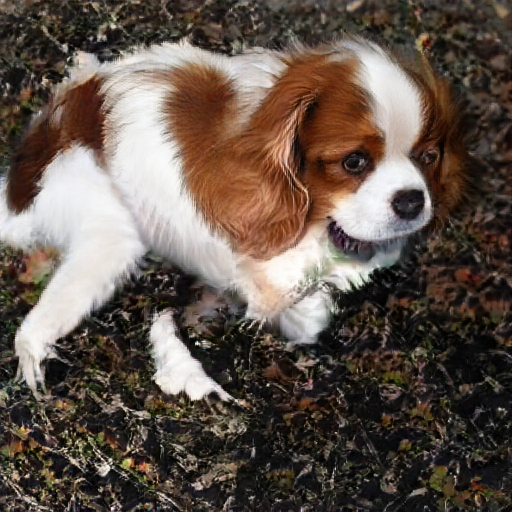

In [44]:
Image.fromarray(ims[156])

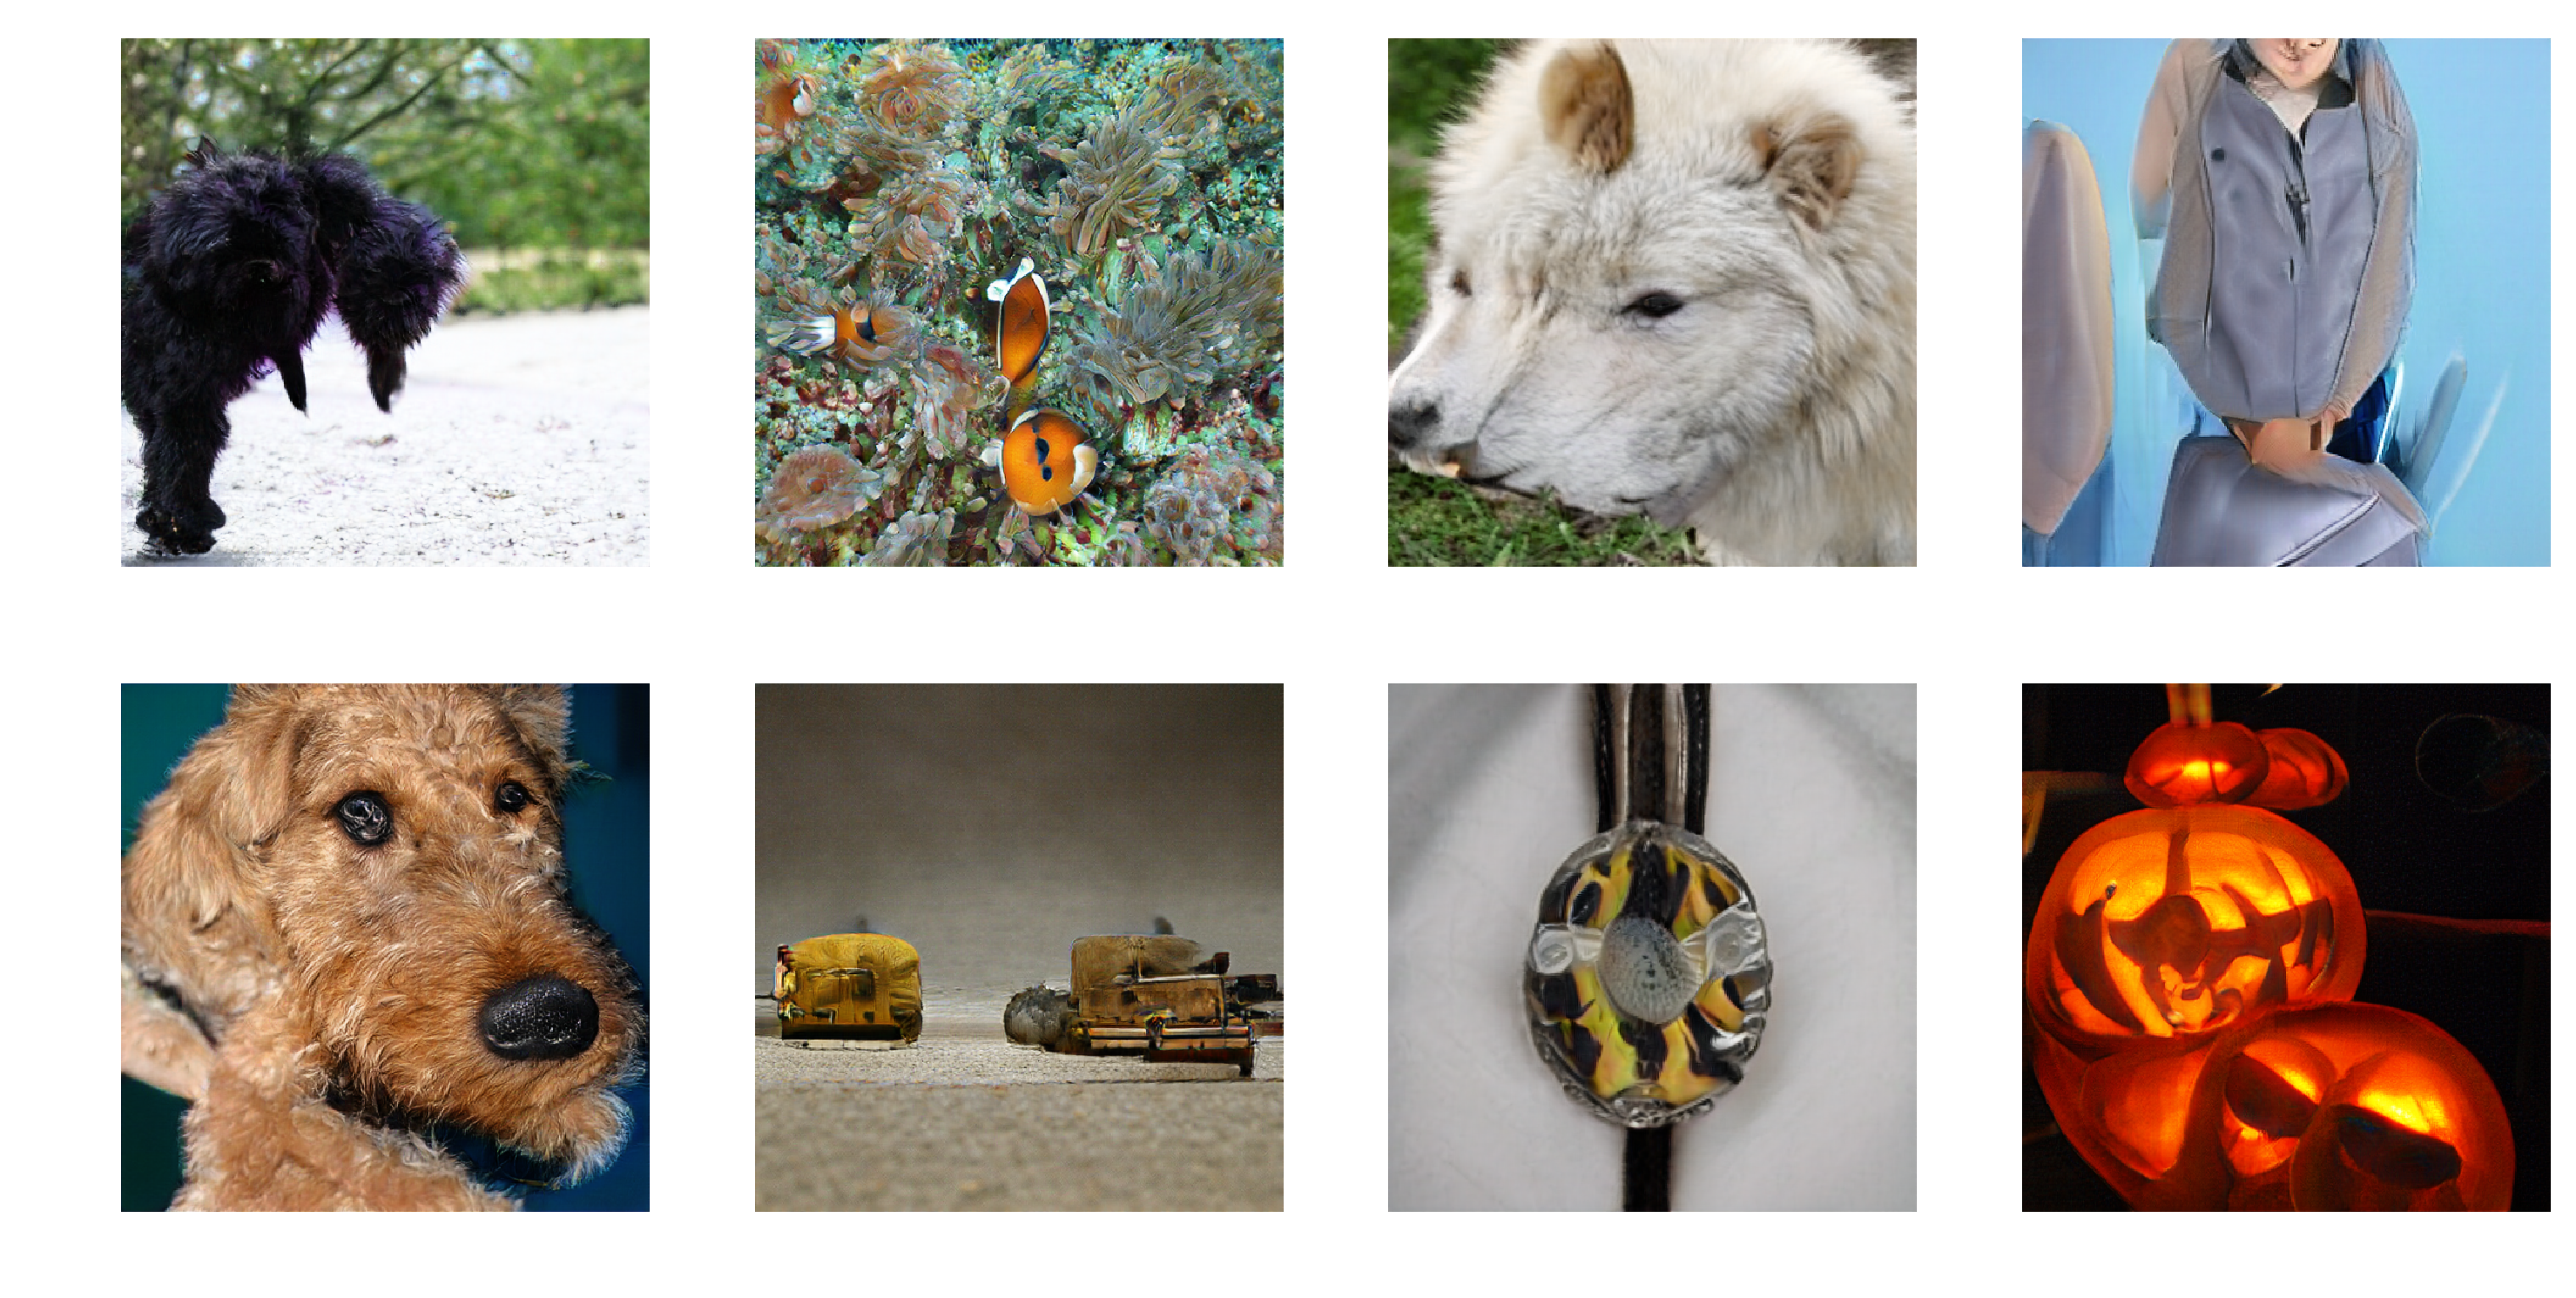

In [3]:
H, W = 2, 4

fig = plt.figure(figsize=(W * 3, H * 3))

for i, sample in enumerate(ims):
    ax = fig.add_subplot(H, W, i + 1)
    ax.axis('off')
    plt.imshow(sample)

plt.show()